<a href="https://colab.research.google.com/github/kartikphopase/TechSonix-FEB25-Phopase-DataScience/blob/main/lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('lung_cancer_prediction.csv')

In [ ]:
# prompt: clean it by handling missing values, converting categorical variables to numerical ones, and normalizing or scaling data as necessary.

# Handling missing values
df.replace('?', np.nan, inplace=True) # Replace '?' with NaN
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Convert categorical variables to numerical using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize or scale data (using MinMaxScaler for demonstration)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


<ipython-input-5-9ec4b8a8789d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-5-9ec4b8a8789d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

                 Age  Mortality_Risk  5_Year_Survival_Probability
count  460292.000000   460292.000000                460292.000000
mean        0.500736        0.500126                     0.499852
std         0.293167        0.288699                     0.289177
min         0.000000        0.000000                     0.000000
25%         0.250000        0.249942                     0.249169
50%         0.500000        0.500402                     0.498891
75%         0.750000        0.750460                     0.751192
max         1.000000        1.000000                     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460292 entries, 0 to 460291
Data columns (total 60 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             460292 non-null  float64
 1   Mortality_Risk                  460292 non-null  float64
 2   5_Year_Survival_Probability     460292 non

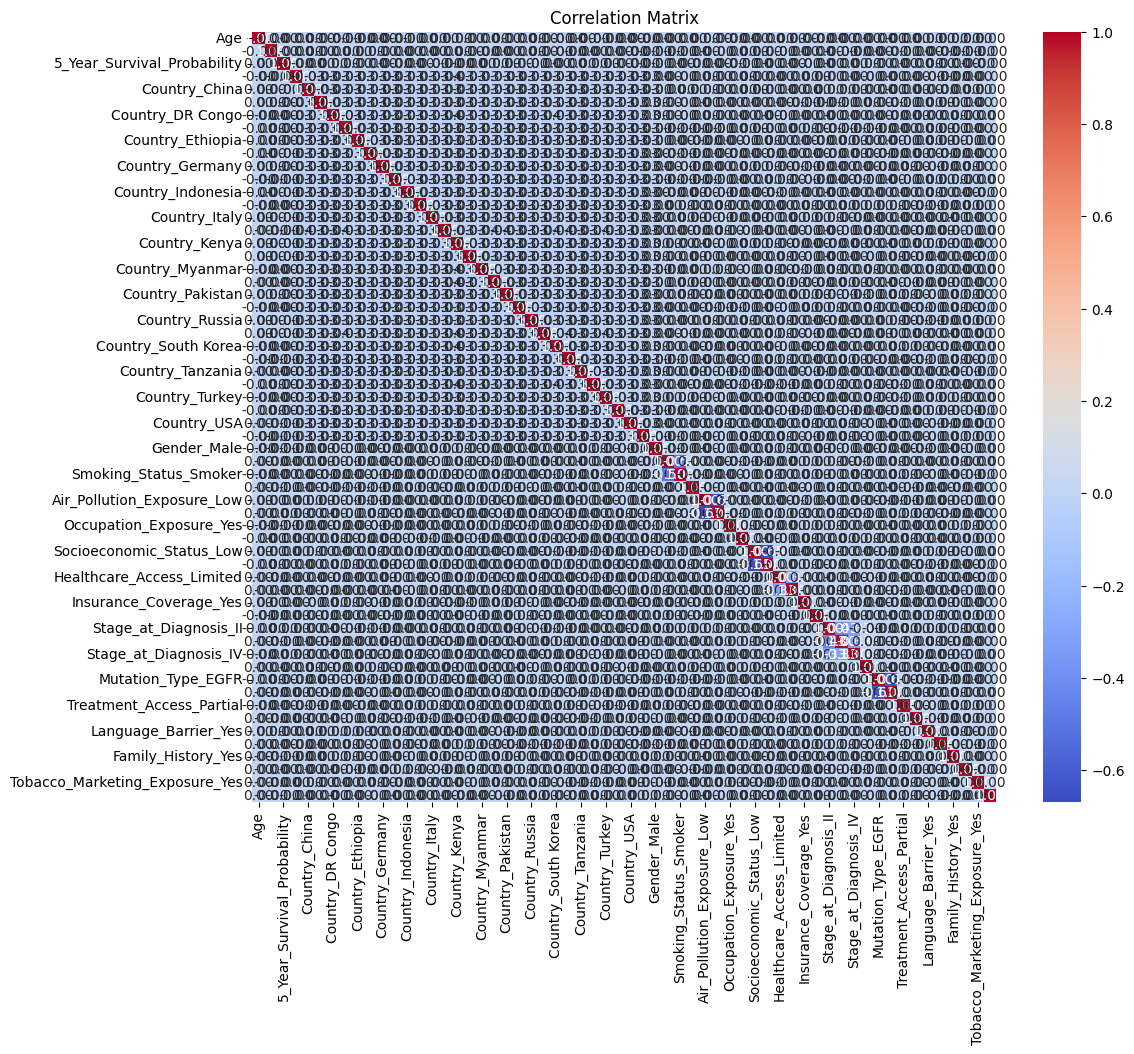

Missing Values:
 Age                               0
Mortality_Risk                    0
5_Year_Survival_Probability       0
Country_Brazil                    0
Country_China                     0
Country_Colombia                  0
Country_DR Congo                  0
Country_Egypt                     0
Country_Ethiopia                  0
Country_France                    0
Country_Germany                   0
Country_India                     0
Country_Indonesia                 0
Country_Iran                      0
Country_Italy                     0
Country_Japan                     0
Country_Kenya                     0
Country_Mexico                    0
Country_Myanmar                   0
Country_Nigeria                   0
Country_Pakistan                  0
Country_Philippines               0
Country_Russia                    0
Country_South Africa              0
Country_South Korea               0
Country_Spain                     0
Country_Tanzania                  0
Country_Tha

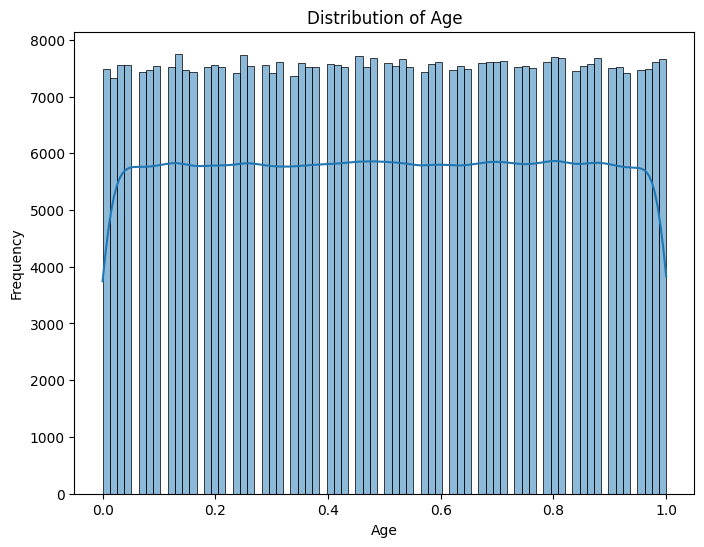

In [ ]:
# prompt: Perform EDA by summarizing the dataset’s main characteristics, using Pandas to find correlations, missing data, and basic statistics, and visualizing trends with Matplotlib and Seaborn

# Summarize the dataset
print(df.describe())
print(df.info())

# Find correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Check for missing data
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)


# Visualize trends (example: distribution of a numerical feature)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (Ensure this is the cleaned version after preprocessing)
df = pd.read_csv("lung_cancer_data.csv")

# Handle missing values (if not done already)
df.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
    else:
        df[col].fillna(df[col].mean(), inplace=True)  # Fill numerical with mean

# Convert categorical variables to numerical using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features (X) and target (y)
X = df.drop(columns=['target'])  # Replace 'target' with actual column name
y = df['target']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'lung_cancer_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (Ensure this is the cleaned version after preprocessing)
df = pd.read_csv("lung_cancer_prediction.csv")

# Handle missing values (if not done already)
df.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
    else:
        df[col].fillna(df[col].mean(), inplace=True)  # Fill numerical with mean

# Convert categorical variables to numerical using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features (X) and target (y)
X = df.drop(columns=['target'])  # Replace 'target' with the actual column name
y = df['target']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


<ipython-input-10-4c168cff8ded>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
<ipython-input-10-4c168cff8ded>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

KeyError: "['target'] not found in axis"

Decision Tree Accuracy: 0.7997

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     73622
           1       0.17      0.00      0.00     18437

    accuracy                           0.80     92059
   macro avg       0.48      0.50      0.44     92059
weighted avg       0.67      0.80      0.71     92059



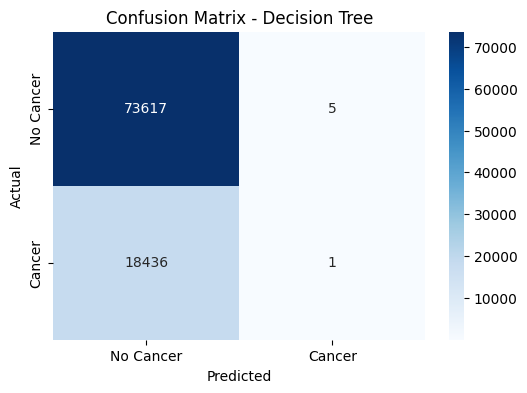

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset

df = pd.read_csv('lung_cancer_prediction.csv')

# Convert categorical target variable to numerical (Yes -> 1, No -> 0)
df['Final_Prediction'] = df['Final_Prediction'].map({'Yes': 1, 'No': 0})

# Select features (excluding "Country" since it's not useful)
X = df.drop(columns=['Final_Prediction', 'Country'])
y = df['Final_Prediction']

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = X.select_dtypes(include=['number']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



Decision Tree Model Performance:

Accuracy: 0.7997

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     73622
           1       0.17      0.00      0.00     18437

    accuracy                           0.80     92059
   macro avg       0.48      0.50      0.44     92059
weighted avg       0.67      0.80      0.71     92059



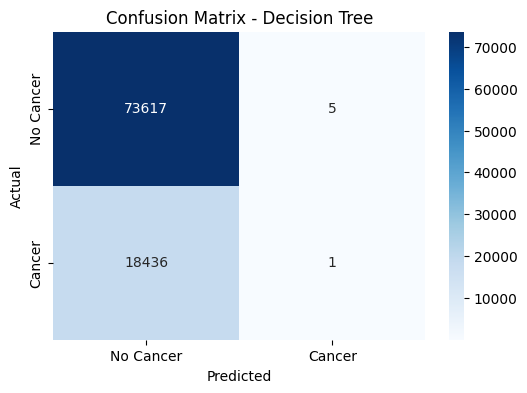

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Logistic Regression Model Performance:

Accuracy: 0.7997

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     73622
           1       0.00      0.00      0.00     18437

    accuracy                           0.80     92059
   macro avg       0.40      0.50      0.44     92059
weighted avg       0.64      0.80      0.71     92059



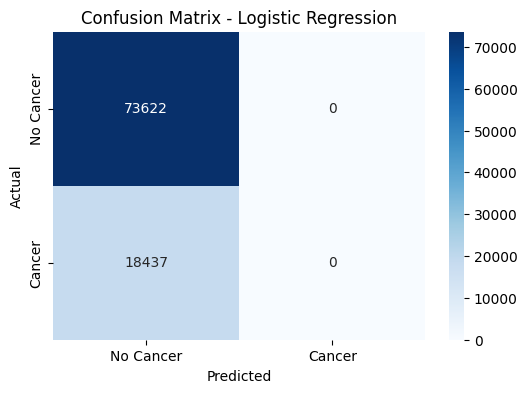

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

df = pd.read_csv('lung_cancer_prediction.csv')

# Convert categorical target variable to numerical (Yes -> 1, No -> 0)
df['Final_Prediction'] = df['Final_Prediction'].map({'Yes': 1, 'No': 0})

# Select features (excluding "Country" as it's not useful)
X = df.drop(columns=['Final_Prediction', 'Country'])
y = df['Final_Prediction']

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = X.select_dtypes(include=['number']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel='linear', probability=True)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']

    results[name] = {
        "Accuracy": accuracy,
        "F1-Score": f1_score,
        "Classification Report": classification_report(y_test, y_pred)
    }

    # Print results
    print(f"\n{name} Model Performance:\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Compare Model Performances
df_results = pd.DataFrame(results).T[['Accuracy', 'F1-Score']]
print("\nModel Comparison:\n")
print(df_results)
